### 군집(Clustering)

* 참고 : https://subinium.github.io/MLwithPython-3-1/

`군집 Clustering`은 데이터셋을 클러스터 Cluster라는 구룹으로 나누는 작업이다. 한 클러스터 안의 데이터포인트끼리 매우 비슷하고, 다른 데이터포인트와는 구분이 되도록 데이터를 나누는 것이 목표이다. 분류알고리즘과 비슷하게 군집알고리즘은 각 데이터 포인터가 어는 클러스터에 속하는 지 할당 또는 예측하는 것이다.

#### Clustering(군집합)

1. 분류의 2가지종류

 - Classification
 - Clustering

2. 군집분석의 원리

 - 거리가 가까운 (유사도가 높은) 객체들을 서로 묶어 하나의 그룹으로 정리
 - 거리(유사도)의 계산방법
   * 유클리드거리(Euclidean distance)가 주로 사용 : 피타고라스정리
   * 맨해턴거리(Mahhattan distance)
 - 군집화의 방법
   * 계층적군집화 방법 : Hierachical method
   * 비계층적 군집화 방법 : K-means clustering(가장 많이 사용)

#### K-means

`K-means, K-평균`군집은 가장 간단하고 널리 사용하는 군집알고리즘이다. 이 알고리즘은 데이터의 어떤 영역을 대표하는 `클러스터 중심 Cluster center`를 찾는다. 이 알고리즘은 두 단계를 반복하는데 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고 그 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터의 중심을 다시 지정한다. 클러스터에 할당되는 데이터포인트에 변화가 없을 때 알고리즘이 종료가 된다.

1. k-means 군집화의 실행단계

 - 나누고자 하는 클러스터의 갯수를 설정, 그 갯수만큼의 `임의의 초기점 생성`
 - initial point를 군집의 중심점으로 생각하고 군집구분을 실시
 - 군집별로 새로운 군집 중심점을 계산
 - 새로운 군집중심점을 기준으로 군집구분을 실시
 - 더이상 군집 구분의 변화가 없을 때까지 군집중심점을 반복 계산
 
2. k-means clustering의 장단점
 - 장점 : 적용이 쉽고 간단하다.
 - 단점 : 군집의 갯수 K값은 사전에 설정해야 한다.(예를 들어 붓꽃 3개인데 2개로 하면 왜곡)
          군집설정에 Outlier(이상치)의 영향이 크게 적용된다.

3. KNN알고리즘(K-means와 다른 알고리즘이므로 주의)
 - k-최근접이웃알고리즘(kNN, k-Nearest Neighbor) : 분류알고리즘 vs 군집알고리즘
 - 지도학습 vs 비지도학습
 - 분류방법 : 동일 값이라도 k의 갯수에 따라 분류결과가 달라진다.
   * k=1인 경우 : 새로운 값이 있을 때 제일 가까운 값으로 분류
   * k=3인 경우 : 새로운 값이 있을 때 다수에 가까운 값으로 분류
   * k값은 홀수로 정의하는 것이 일반적

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['image.cmap'] = "gray"
# plt.rcParams['axes.xmargin'] = 0.05
# plt.rcParams['axes.ymargin'] = 0.05

In [2]:
import mglearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

##### 실습 1. k-means의 blobs데이터셋

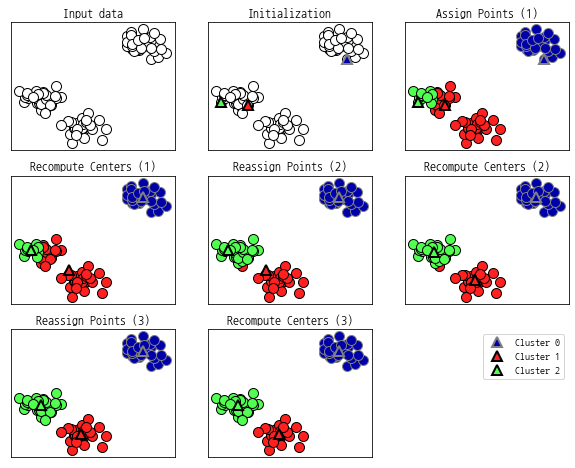

In [3]:
mglearn.plots.plot_kmeans_algorithm() # k-means알고리즘을 설명하는 그래프

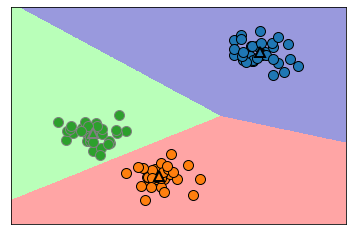

In [4]:
mglearn.plots.plot_kmeans_boundaries() # 군집의 결과를 보여주는 예제 그래프

##### 실습 2. 인위적인 2차원 데이터셋

In [5]:
# bobls 내장된 2차원 데이터셋 
X, y = datasets.make_blobs(random_state=42)
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

# KMeans() : 군집화 모델을 생성(기계학습)
# 클러스터의 갯수(k) = 3으로 설정
# 비지도학습이기 때문에 X값 즉, 데이터만 전달(input)
kmeans = KMeans(n_clusters=3) # 클러스터수를 3, 5 또는 7...등으로 변경해서 실습해 볼 것
kmeans.fit(X)

(100, 2) (100,)
[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]]
[2 1 0 1 2]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print(kmeans.labels_)
print(y)
print(kmeans.predict(X))

[1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]
[2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]
[1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]


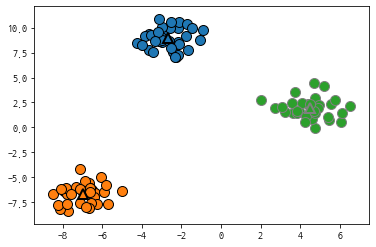

In [7]:
# 시각화
kmeans = KMeans(n_clusters=3).fit(X)
label3 = np.unique(kmeans.labels_)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                        label3, markers='^', markeredgewidth=2)

plt.show()

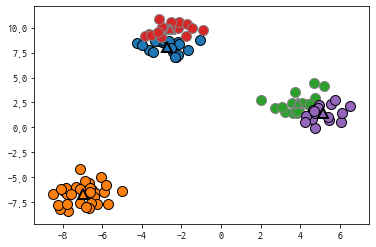

In [8]:
kmeans = KMeans(n_clusters=5).fit(X)
label5 = np.unique(kmeans.labels_)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                        label5, markers='^', markeredgewidth=2)

plt.show()

#### K-means 알고리즘이 실패하는 경우

데이터셋의 클러스터 갯수를 정확하게 알고 있더라도 k-means알고리즘이 항상 이를 구분해 낼 수 있는 것은 아니다. 각 클러스터를 정의하는 것이 중심 하나 뿐이기 때문에 클러스터는 둥근 형태로 나타난다.

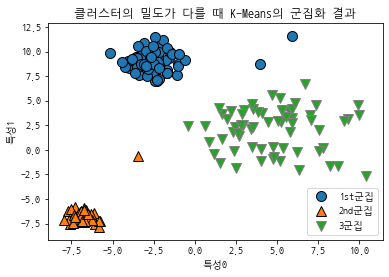

In [50]:
X_varied, y_varied = datasets.make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5],
                                        random_state=42)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["1st군집", "2nd군집", "3군집"], loc=4)
plt.xlabel("특성0"); plt.ylabel("특성1")
plt.title("클러스터의 밀도가 다를 때 K-Means의 군집화 결과")
plt.show()

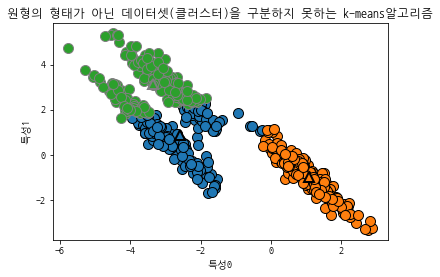

In [64]:
# A. 데이터셋의 분포가 원형이 아닐경우 k-means알고리즘은 잘 분류하지 못한다.

# 1. 무작위 클러스터 데이터를 생성
X, y = datasets.make_blobs(n_samples=600, random_state=170)
rng = np.random.RandomState(74)

# 2. 테이터가 길게 늘어지도록 인위적으로 변경
#    실습데이터를 행렬곱으로 생성
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 3. k값이 3인 K-means알고리즘을 적용 : 기계학습
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)

# 4. 인위적인 데이터셋을 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], 
                         kmeans.cluster_centers_[:,1],
                         [0,1,2],
                         markers='^',
                         markeredgewidth=2)

plt.xlabel("특성0")
plt.ylabel("특성1")
plt.title("원형의 형태가 아닌 데이터셋(클러스터)을 구분하지 못하는 k-means알고리즘")
plt.show()

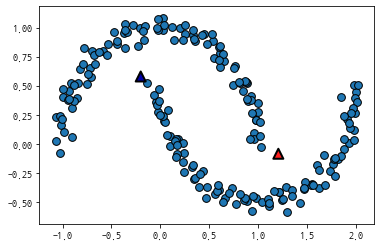

In [72]:
# B. 복잡한 클러스터를 k-means알고리즘은 잘 분류하지 못한다.

# 1. 인위적으로 복잡한 클러스터를 가진 데이터를 생성
# make_moons함수를 이용하여 2개의 달의 형태를 가진 테이터생성(노이즈는 0.05)
X, y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

# 2. k=2인 K-means알고리즘 적용 : 기계학습
kmeans = KMeans(n_clusters=2).fit(X)
y_pred = kmeans.predict(X)

# 기계학습결과를 시각화
plt.scatter(X[:,0], X[:,1], s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1],
            marker='^',
            c=[mglearn.cm2(0), mglearn.cm2(1)],
            s=100,
            linewidths=2,
            edgecolors='k')
plt.show()

# 결과분석
# two_moons데이터처럼 복잡한 형태라면 성능이 더 나빠진다. 군집알고리즘이 두개의 반달모양을 분류하면
# 좋겠지만 k-means알고리즘을 사용해서는 분류하기가 어렵다.

###### 고유얼굴 특성 추출

`PCA`는 특성추출에도 이용한다. 특성추출은 원본 데이터표현보다 분석하기에 더 적합한 표현을 찾을 수 있다라는 생각에서 출발한다. 이미지를 다루는 애플리케이션은 특성추출에 도움이 되는 예제이다. 이미지는 RGB강도가 기록된 픽셀로 구성된다.

PCA를 이용하여 `LFW Labeled Faces in the Wild`데이터셋의 얼굴이미지에수 특성을 추출하고 NMF와 K-means의 결과를 비교해 보자

이 이미지는 유명인사의 얼굴이미지들로 정치가, 가수, 배우, 운동선수등 62명의 얼굴이미지로 3023개의 이미지를 제공. 이미지의 사이지는 87x65픽셀이다.

In [10]:
# PCA : 주성분(특성)추출, NMF : 흑백이미지
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_lfw_people

(3023, 87, 65)


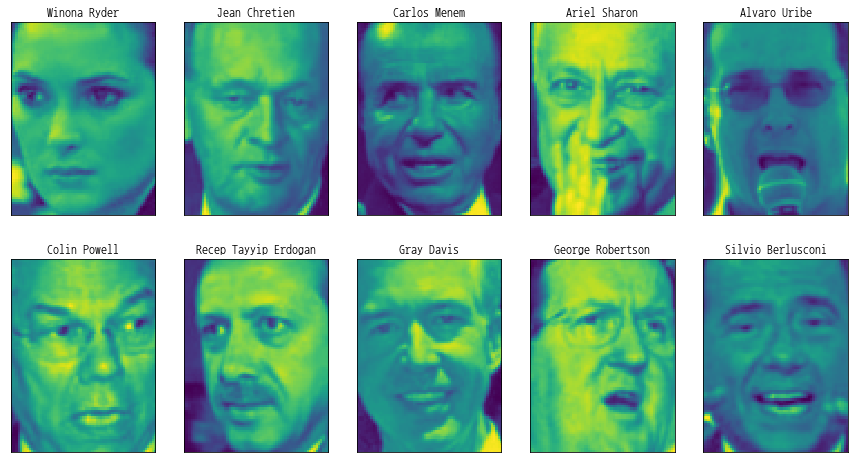

In [11]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(people.images.shape)

# 샘플이미지시각화
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [17]:
# 각 이미지가 나타난 횟수를 계산
people.target[0:10], people.target_names[people.target[0:10]]
counts = np.bincount(people.target)
print(counts)
print()

# 타깃별이름과 횟수를 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end= '   ')
    if(i+1) % 3 == 0:
        print()

[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jac

In [22]:
# 데이터의 편중을 없애기 위해 사람당 50개의 이미지만 선택
# 이렇게 하지 않으면 부시의 사진만 제일 많이 나올 가능성이 있다.
mask = np.zeros(people.target.shape, dtype=np.bool)
print(mask)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
print(mask)

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255사이의 흑백이미지의 픽셀 값을 0~1사이의 값으로 스케일조정
# MinMaxScaler을 적용하는 것과 거의 동일한 결과이다.
X_people = X_people / 255.0 # 컬러이미지를 흑백이미지로 변환

[False False False ... False False False]
[ True  True  True ... False False False]


In [31]:
# 데이터분할 및 기계학습
X_train, X_test, y_train, y_test = \
    train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0).fit(X_train)
pca = PCA(n_components=100, random_state=0).fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0).fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

Text(0, 0.5, 'NMF')

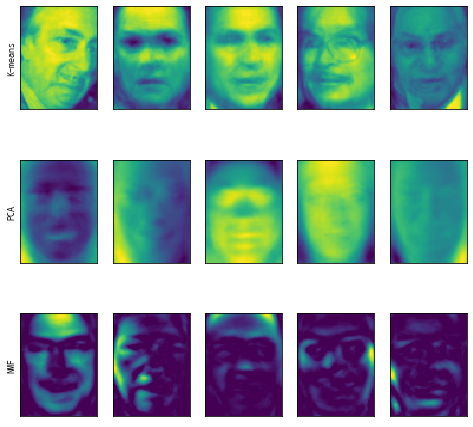

In [35]:
# K-means의 클러스터중심과 PCA, NNF로 찾은 성분의 비교
image_shape = people.images[0].shape
image_shape
fig, axes = plt.subplots(3, 5, figsize=(8,8), subplot_kw={'xticks':(), 'yticks': ()})
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, 
                                            kmeans.cluster_centers_, 
                                            pca.components_, 
                                            nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))    
    
axes[0,0].set_ylabel("K-means")
axes[1,0].set_ylabel("PCA")
axes[2,0].set_ylabel("NMF")

Text(0, 0.5, 'NMF')

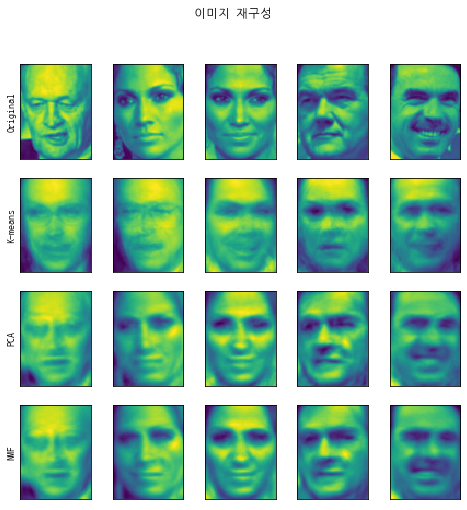

In [52]:
# 성분(또는 클러스터중심) 100개를 사용한 k-means, PCA, NMF의 이미지를 재구성후 비교
# k-means는 이미지당 하나의 클러스터 중심만 사용
fig, axes = plt.subplots(4,5,subplot_kw={'xticks':(), 'yticks':()}, figsize=(8,8))
fig.suptitle("이미지 재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, 
                                                  X_test, 
                                                  X_reconstructed_kmeans,
                                                  X_reconstructed_pca,
                                                  X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))    
    
axes[0,0].set_ylabel("Original")
axes[1,0].set_ylabel("K-means")
axes[2,0].set_ylabel("PCA")
axes[3,0].set_ylabel("NMF")

#### 벡터양자화 또는 분해메서드로서의 k-means

k-means이 군집알고리즘이지만 `k-means`와 `PCA, NMF`와 같은 알고리즘은 분해알고리즘에 있어서 유사점이 있다. `PCA`는 데이터에서 분산이 가장 큰 방향을 찾으려고 하고 NMF는 데이터의 극단 또는 일부분에 중첩가능한 성분(음수가 아닌 성분)을 찾는다. PCA와 NMF 두가지 방법은 모두 데이터포인트를 어떤 성분의 합으로 표현한다. 반면에 k-means는 클러스터를 중심으로 각 데이터를 표현한다. 이를 각 데이터포인트가 클러스터중심 즉, 하나의 성분으로 표현된다고 볼 수 있다. k-means를 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 `벡터의 양자화 Vector quantization`이라고 한다.

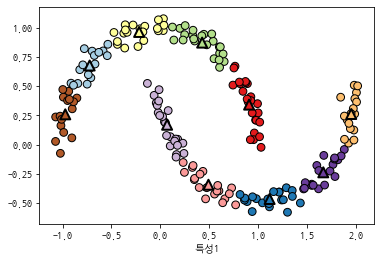

클러스터의 레이블: [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


In [78]:
# two_moons데이터셋을 사용
# k-means를 사용한 벡터양자화는 입력데이터의 차원보다 더 많은 클러스터를 사용해 데이터를 인코딩할 수 있다
# 10개의 클러스터를 사용해서 각 데이터포인터는 0~9사이의 값(숫자)이 할당된다.
X, y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], s=60, c=y_pred, edgecolors='k', cmap='Paired')

plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1],
            marker='^',
            c=range(kmeans.n_clusters),
            cmap='Paired',
            s=100,
            linewidths=2,
            edgecolors='k')
plt.xlabel("특성0")
plt.xlabel("특성1")
plt.show()

print("클러스터의 레이블: {}".format(y_pred))

# 결과분석
# two_moons데이터는 2차원데이터이기 때문에 PCA와 NMF로 할 수 있는 것이 많지는 않다. PCA, NMF을 사용해 차원축소를
# 하면 1차원 데이터셋으로 변환되어 그 결과 데이터구조가 완전히 파괴될 수 있기 때문이다. 
# 하지만 벡터양자화(데이터의 차원보다 더 많은 클러스터를 사용)된 K-means를 사용한다면 데이터를 더 잘 표현할 수
# 있다.

In [84]:
distance_features = kmeans.transform(X)
print("클러스터의 거리 데이터의 형태: {}".format(distance_features.shape))
print("클러스터의 거리: {}".format(distance_features))

클러스터의 거리 데이터의 형태: (200, 10)
클러스터의 거리: [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


###### k-means의 장단점

`k-means`은 비교적 이해하기 쉽고 구현도 쉬울 뿐만 아니라 비교적 빠르기 때문에 가장 인기 있는 군집알고리즘이다. `k-means`는 데용량 데이터셋에서도 잘 동작하지난 `scikit-learn`은 아주 큰 데이터셋을 처리할 수 있는 `MinBatchKMeans`도 제공한다. MinBatchKMeans는 알고리즘이 반복될 때 전체 데이터에서 일부를 무작위로 선택(MinBatch)해서 클러스터의 중심을 계산한다. 미니배치의 크기는 `batch_size`매개변수로 지정하면 기본값은 100이다.

k-means의 단점은 무작위 초기화를 사용하여 알고리즘의 출력이 난수 초기값에 따라 달라 진다는 점이다. 이러점을 보완하기위해서 scikit-learn은 기본적으로 서로 다른 난수의 초기값으로 10번반복하여 최선의 초기값을 결정한다.

k-means의 더 큰 단점은 클러스터의 모양을 원형 또는 밀집된 형태로 가정하고 있어서 활용범위가 비교적 제한적이면 또 찾으려는 클러스터의 갯수를 사전에 지정해야 한다는 것이다.

이런 단점을 개선한 두가지 군집알로리즘은 `병합군집`과 `DBSCAN`이라는 알고리즘이다.

##### 실습 1. k-Means(iris데이터셋)

In [85]:
import sklearn.metrics as sm

In [89]:
iris = datasets.load_iris()
print(iris.data[:5])
print(iris.feature_names) # 독립변수 : 꽃받침, 꽃잎의 길이와 넓이
print(iris.target[:5])    # 종속변수 : iris의 3가지 품종
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [95]:
# 데이터프레임으로 변환
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y.columns = ['Targets']
display(X.head())
display(y.head())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,Targets
0,0
1,0
2,0
3,0
4,0


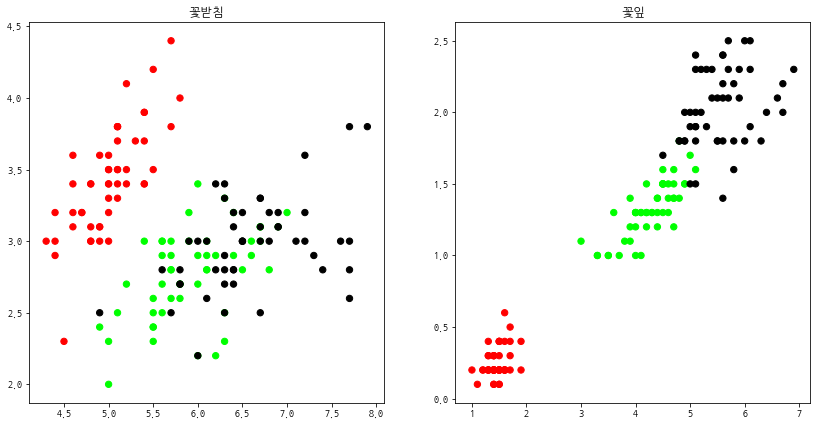

In [100]:
# 데이터의 시각화
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black']) # 색상배열
plt.subplot(1,2,1) # 1행2열중 1번째 그래프
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.Targets], s=40) # 꽃받침 기준 그래프
plt.title("꽃받침")

plt.subplot(1,2,2) # 1행2열중 1번째 그래프
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.Targets], s=40) # 꽃받침 기준 그래프
plt.title("꽃잎")

plt.show()

In [105]:
# 기계학습
kmeans = KMeans(n_clusters=3).fit(X)
print(kmeans)
print(kmeans.labels_) # 클러스터링한 결과

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


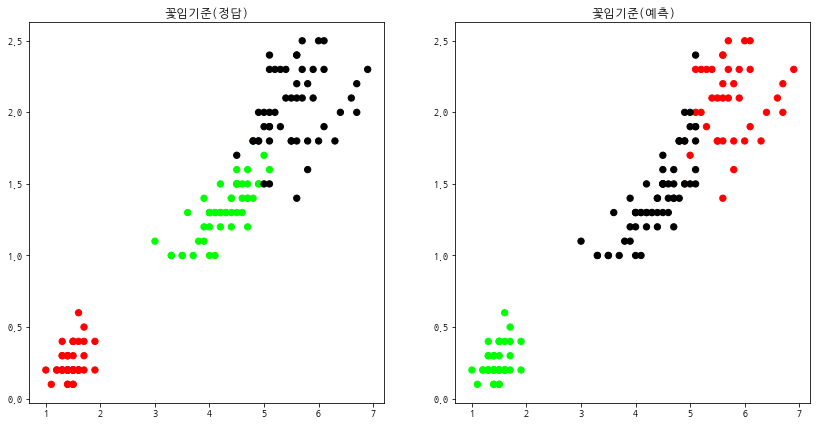

In [107]:
# 정답과 예측한 결과 비교 시각화
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black']) # 색상배열
plt.subplot(1,2,1) # 정답
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.Targets], s=40) # 꽃잎 기준 그래프
plt.title("꽃입기준(정답)")

plt.subplot(1,2,2) # 예측
plt.scatter(X.petal_length, X.petal_width, c=colormap[kmeans.labels_], s=40) # 꽃잎 기준 그래프
plt.title("꽃입기준(예측)")

plt.show()

# 결과분석
# clustering은 비교적 잘 되었지만 색상이 다름(label(정답)이 다르게 매개짐)
# kmeans알고리즘은 비지도학습이기 때문에 정답을 사전에 알 수가 없어서 군집은 잘 나누어지지만
# 라벨번호는 문제가 없다.
# 즉, 색상이 바뀌어서 출력되는 것은 의미가 없고 잘 분류되었는지 여부가 중요핟.

In [111]:
# label 순서변경
# [0,1,2] 에서 [2,0,1]로 변경할 경우 색상도 일치
predY = np.choose(kmeans.labels_, [2,0,1]).astype(np.int64)
print(kmeans.labels_)
print(predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


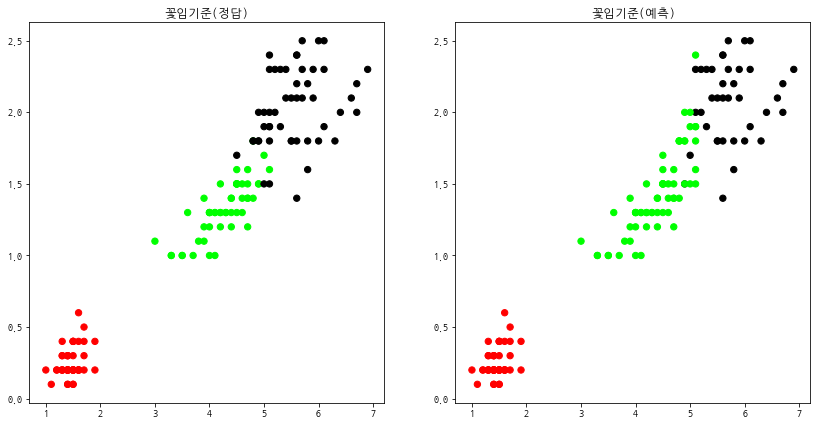

In [112]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black']) # 색상배열
plt.subplot(1,2,1) # 정답
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.Targets], s=40) # 꽃잎 기준 그래프
plt.title("꽃입기준(정답)")

plt.subplot(1,2,2) # 예측
plt.scatter(X.petal_length, X.petal_width, c=colormap[predY], s=40) # 꽃잎 기준 그래프
plt.title("꽃입기준(예측)")

plt.show()

In [116]:
# 분류결과확인
print("군집 정확도: {:.3f}".format(sm.accuracy_score(y, predY)))

군집 정확도: 0.893


In [117]:
# 분류결과표
sm.confusion_matrix(y, predY)

# 결과분석
# 품종1은 50개중 50개 예측 100%
# 품종2은 50개중 48개 예측 ??%
# 품종1은 50개중 36개 예측 ???

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

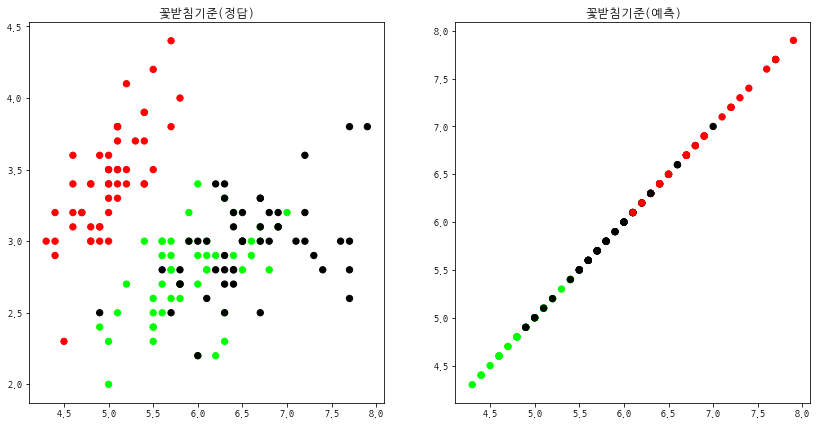

In [108]:
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black']) # 색상배열
plt.subplot(1,2,1) # 정답
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.Targets], s=40) # 꽃잎 기준 그래프
plt.title("꽃받침기준(정답)")

plt.subplot(1,2,2) # 예측
plt.scatter(X.sepal_length, X.sepal_length, c=colormap[kmeans.labels_], s=40) # 꽃잎 기준 그래프
plt.title("꽃받침기준(예측)")

plt.show()

##### 실습 2. k-Means(cancer 데이터셋)

In [125]:
cancer = datasets.load_breast_cancer()
print(cancer.data[:5])
print(cancer.data.shape)
print(cancer.feature_names) # 독립변수 
print(cancer.feature_names.shape) 
print(cancer.target[:5])    # 종속변수 : 
print(cancer.target_names)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [160]:
j = 0
for i in cancer.feature_names:
    print(j, '=', i)
    j += 1

0 = mean radius
1 = mean texture
2 = mean perimeter
3 = mean area
4 = mean smoothness
5 = mean compactness
6 = mean concavity
7 = mean concave points
8 = mean symmetry
9 = mean fractal dimension
10 = radius error
11 = texture error
12 = perimeter error
13 = area error
14 = smoothness error
15 = compactness error
16 = concavity error
17 = concave points error
18 = symmetry error
19 = fractal dimension error
20 = worst radius
21 = worst texture
22 = worst perimeter
23 = worst area
24 = worst smoothness
25 = worst compactness
26 = worst concavity
27 = worst concave points
28 = worst symmetry
29 = worst fractal dimension


In [190]:
X = pd.DataFrame(cancer.data)
X.rename(columns={0:'mean_radius', 2:'mean_perimeter', 20:'worst_radius', 22:'worst_perimeter', }, inplace=True)
X = X[['mean_radius', 'mean_perimeter', 'worst_radius', 'worst_perimeter']]
y = pd.DataFrame(cancer.target)
y.columns = ['Targets']
display(X.head())
display(y.head())

,mean_radius,mean_perimeter,worst_radius,worst_perimeter
0,17.99,122.80,25.38,184.60
1,20.57,132.90,24.99,158.80
2,19.69,130.00,23.57,152.50
3,11.42,77.58,14.91,98.87
4,20.29,135.10,22.54,152.20


,Targets
0,0
1,0
2,0
3,0
4,0


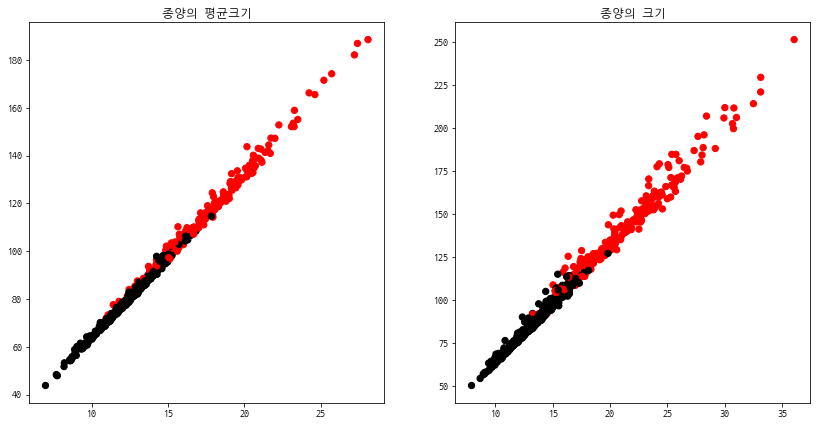

In [176]:
# 데이터의 시각화
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'black']) # 색상배열
plt.subplot(1,2,1) # 1행2열중 1번째 그래프
plt.scatter(X.mean_radius, X.mean_perimeter, c=colormap[y.Targets], s=40) # 종양의 평균크기
plt.title("종양의 평균크기")

plt.subplot(1,2,2) # 1행2열중 1번째 그래프
plt.scatter(X.worst_radius, X.worst_perimeter, c=colormap[y.Targets], s=40) # 종양의 크기
plt.title("종양의 크기")

plt.show()       

In [170]:
# 기계학습
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans)
print(kmeans.labels_) # 클러스터링한 결과
print(kmeans.labels_.shape)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 

In [187]:
y.Targets.shape

(569,)

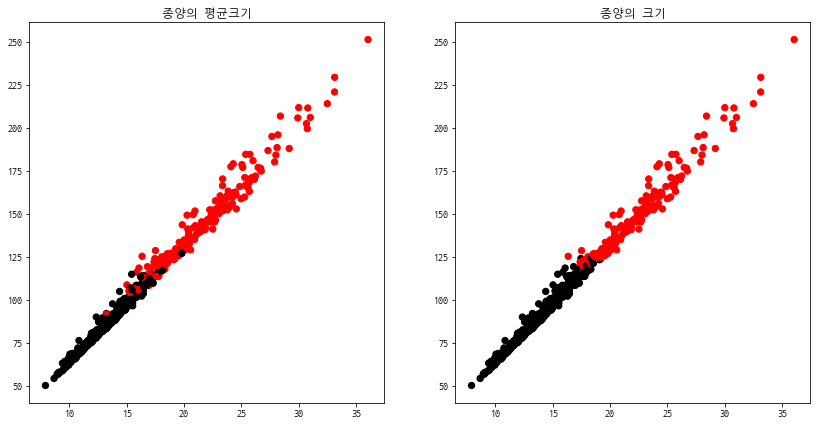

In [171]:
# 데이터의 시각화
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'black']) # 색상배열
plt.subplot(1,2,1) # 1행2열중 1번째 그래프
plt.scatter(X.worst_radius, X.worst_perimeter, c=colormap[y.Targets], s=40) # 종양의 평균크기
plt.title("종양의 평균크기")

plt.subplot(1,2,2) # 1행2열중 1번째 그래프
plt.scatter(X.worst_radius, X.worst_perimeter, c=colormap[kmeans.labels_], s=40) # 종양의 크기
plt.title("종양의 크기")

plt.show()

In [173]:
# 분류결과확인
print("군집 정확도: {:.3f}".format(sm.accuracy_score(y, kmeans.labels_)))

군집 정확도: 0.888


In [174]:
# 분류결과표
sm.confusion_matrix(y, kmeans.labels_)

array([[150,  62],
       [  2, 355]], dtype=int64)

### 강문구

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


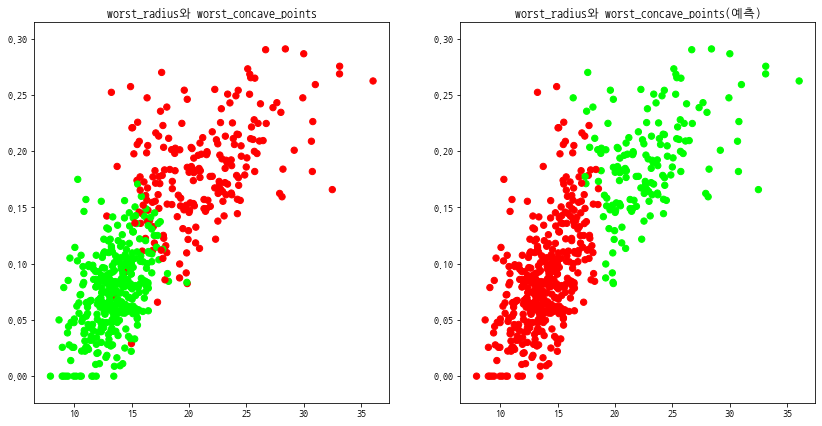

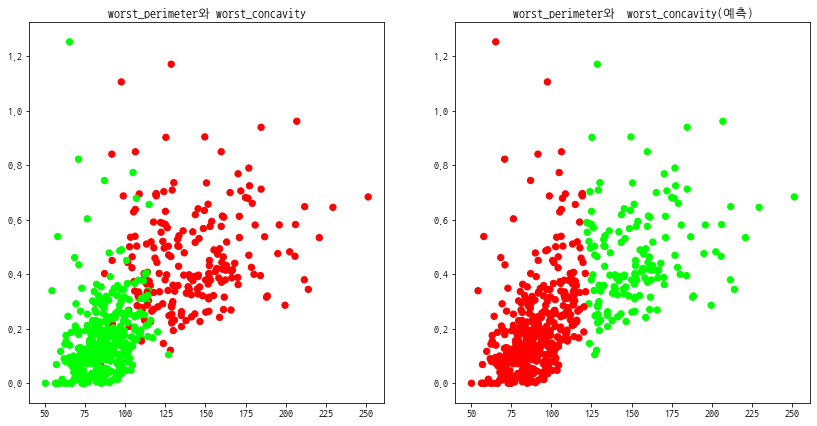

군집 정확도 : 0.89455
[[153  59]
 [  1 356]]


In [206]:
cancer = datasets.load_breast_cancer()
# print(cancer.data[:5])
print(cancer.feature_names) 
# print(cancer.target[:5]) 
print(cancer.target_names) # 사용할 것 'worst radius, worst concave points, worst perimeter,worst concavity

X = pd.DataFrame(cancer.data,columns = cancer.feature_names)
y= pd.DataFrame(cancer.target)
y.columns=['Targets']
X = X[['worst radius','worst concave points','worst perimeter','worst concavity']]
X.columns = ['worst_radius','worst_concave_points','worst_perimeter','worst_concavity']
X.head()
# y.head()

# 기계학습
kmeans = KMeans(n_clusters=2).fit(X)
# print(kmeans)
# print(kmeans.labels_) # 클러스터링
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime']) 
plt.subplot(1,2,1) # 정답
plt.scatter(X.worst_radius,X.worst_concave_points,c=colormap[y.Targets],s=40)
plt.title("worst_radius와 worst_concave_points")

plt.subplot(1,2,2) # 예측
plt.scatter(X.worst_radius,X.worst_concave_points,c=colormap[kmeans.labels_],s=40)
plt.title("worst_radius와 worst_concave_points(예측)")

plt.show()
# # ================================================================
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime']) # 색상 배열
plt.subplot(1,2,1) # 정답
plt.scatter(X.worst_perimeter,X.worst_concavity,c=colormap[y.Targets],s=40)
plt.title("worst_perimeter와 worst_concavity")

plt.subplot(1,2,2) # 예측
plt.scatter(X.worst_perimeter,X.worst_concavity,c=colormap[kmeans.labels_],s=40)
plt.title("worst_perimeter와  worst_concavity(예측)")
plt.show()
# # ================================================================


predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)
print("군집 정확도 : {:.5f}".format(sm.accuracy_score(y,predY)))
print(sm.confusion_matrix(y,predY)) 

### 김동연

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

,worst_radius,worst_texture,worst_perimeter,worst_area
0,25.38,17.33,184.60,2019.0
1,24.99,23.41,158.80,1956.0
2,23.57,25.53,152.50,1709.0
3,14.91,26.50,98.87,567.7
4,22.54,16.67,152.20,1575.0


,Targets
0,0
1,0
2,0
3,0
4,0


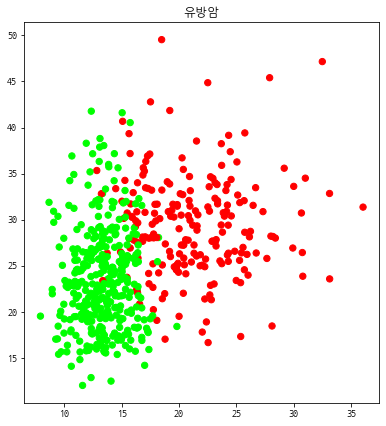

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 

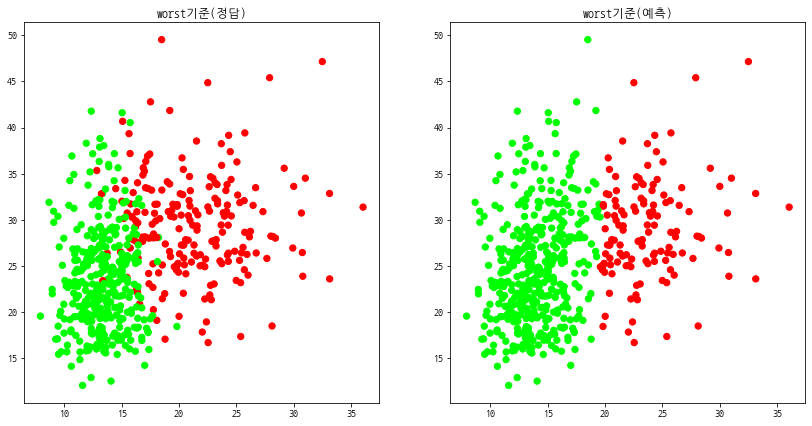

군집 정확도: 0.854


In [202]:
cancer = datasets.load_breast_cancer()
print(cancer.data[:5])
print(cancer.feature_names) # 독립변수 : 꽃받침, 꽃잎의 길이와 넓이
print(cancer.target[:5])    # 종속변수 : iris의 3가지 품종
print(cancer.target_names)

# 데이터프레임으로 변환
X = pd.DataFrame(cancer.data)
y = pd.DataFrame(cancer.target)
X.columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension']
X= X[['worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area']]
y.columns = ['Targets']
display(X.head())
display(y.head())

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])# 색상배열
plt.subplot(1,2,1) # 1행2열중 1번째 그래프
plt.scatter(X.worst_radius, X.worst_texture, c=colormap[y.Targets], s=40) # 꽃받침의 기준 그래프
plt.title("유방암")

plt.show()

# 기계학습
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans)
print(kmeans.labels_) # 클러스터링한 결과

# label 순서변경
predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)
print(kmeans.labels_)
print(predY)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black']) # 색상배열
plt.subplot(1,2,1) # 정답
plt.scatter(X.worst_radius, X.worst_texture, c=colormap[y.Targets], s=40) # 꽃잎 기준 그래프
plt.title("worst기준(정답)")

plt.subplot(1,2,2) # 예측
plt.scatter(X.worst_radius, X.worst_texture, c=colormap[predY], s=40) # 꽃잎 기준 그래프
plt.title("worst기준(예측)")

plt.show()

# 분류결과확인
print("군집 정확도: {:.3f}".format(sm.accuracy_score(y, predY)))

### 김민규

군집 정확도: 0.89455


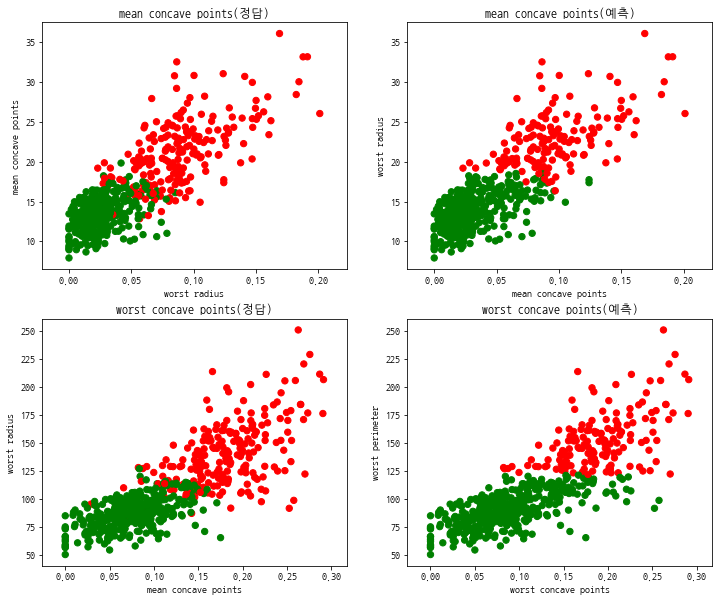

In [205]:
cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns=cancer.feature_names
cancer_df['malignant']=cancer.target

# 선형회기 rvalue 높은값 4개
from scipy import stats
a = []
for i in range(29):
    result = stats.linregress(cancer_df.iloc[:,i], cancer_df['malignant'])
    a.append(abs(result.rvalue))

rvalue = pd.DataFrame({'rvalue':a})
high_rval = rvalue.sort_values('rvalue', ascending=False).iloc[:4].index

# 기계학습
kmeans = KMeans(n_clusters=2).\
    fit(cancer_df.iloc[:,high_rval])

# 정확도
cancerY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)
print("군집 정확도: {:.5f}".format(sm.accuracy_score(cancer.target, cancerY)))

# 예측 시각화
plt.figure(figsize=(12,10))
colormap = np.array(['red', 'green'])
plt.subplot(2,2,1) 
plt.scatter(cancer_df['mean concave points'], cancer_df['worst radius']
            , c=colormap[cancer.target], s=40) 
plt.xlabel('worst radius')
plt.ylabel('mean concave points')
plt.title("mean concave points(정답)")

plt.subplot(2,2,2)
plt.scatter(cancer_df['mean concave points'], cancer_df['worst radius']
            , c=colormap[cancerY], s=40) 
plt.xlabel('mean concave points')
plt.ylabel('worst radius')
plt.title("mean concave points(예측)")

plt.subplot(2,2,3) 
plt.scatter(cancer_df['worst concave points'], cancer_df['worst perimeter']
            , c=colormap[cancer.target], s=40) 
plt.xlabel('mean concave points')
plt.ylabel('worst radius')
plt.title("worst concave points(정답)")

plt.subplot(2,2,4)
plt.scatter(cancer_df['worst concave points'], cancer_df['worst perimeter']
            , c=colormap[cancerY], s=40)
plt.xlabel('worst concave points')
plt.ylabel('worst perimeter')
plt.title("worst concave points(예측)")

plt.show()

### 김승혁

0.9209138840070299


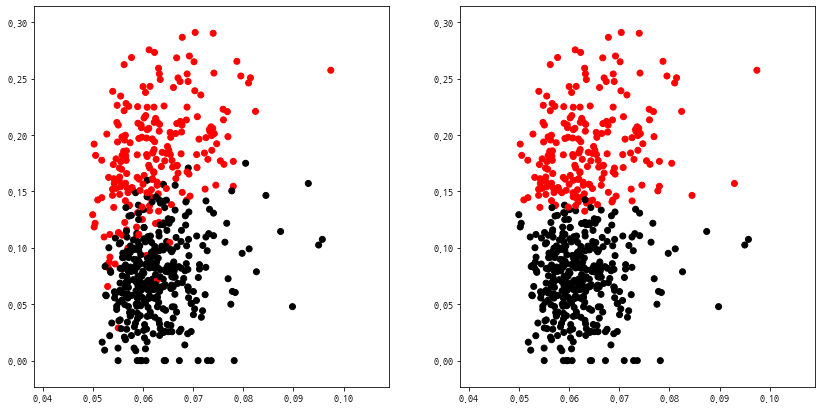

In [209]:
cancer = datasets.load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['target'])

from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X, y) 
mlr.coef_
# 7.146440155040024 -15.854320748152018, -1.05679513e+01, -4.30348309e+00
#  fractal dimension error 20, smoothness error 15, concave points error 18,worst fractal dimension30
# 가장 영향이 큰거 4개

# 수정 최대 정확조합 92
x = X.iloc[:,[7, 9, 14, 27]]

kmeans = KMeans(n_clusters=2).fit(x)

predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap=np.array(['red','black'])
plt.subplot(1,2,1) # 정답
plt.scatter(x.iloc[:,1],x.iloc[:,3], c= colormap[y.target]) # 꽃잎기준 정답

plt.subplot(1,2,2) # 예측
plt.scatter(x.iloc[:,1],x.iloc[:,3], c= colormap[predY])

print(sm.accuracy_score(y,predY))


### 박재민

0.8945518453427065


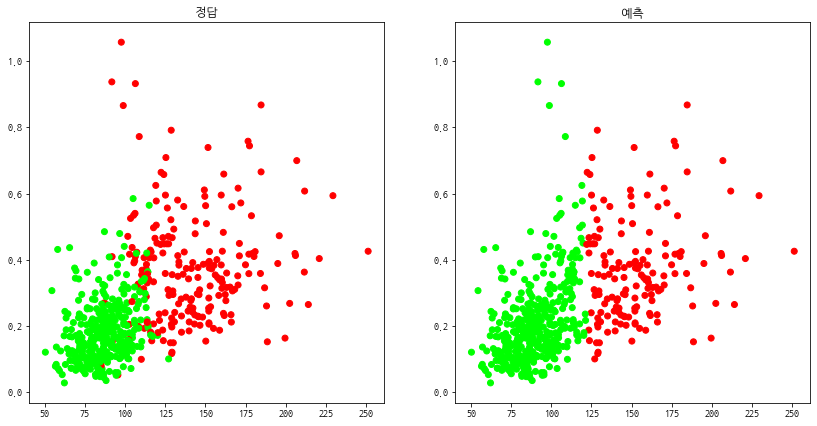

In [210]:
cancer = datasets.load_breast_cancer()

X = pd.DataFrame(cancer.data)
y = pd.DataFrame(cancer.target)

X.columns = cancer.feature_names
y.columns = ['Targets']

x = X.iloc[:,[19,22,25,26]] # 0.89455

kmeans = KMeans(n_clusters=2).fit(x)

predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime'])

plt.subplot(1,2,1) # 정답
plt.scatter(x.iloc[:,1],x.iloc[:,2], c= colormap[y.Targets])
plt.title('정답')

plt.subplot(1,2,2) # 예측
plt.scatter(x.iloc[:,1],x.iloc[:,2], c= colormap[predY])
plt.title('예측')

print(sm.accuracy_score(y,predY))

### 이은수

[ 7  8 18 19 27]


{(7, 27): 0.9209138840070299,
 (8, 27): 0.9050966608084359,
 (18, 27): 0.9033391915641477,
 (19, 27): 0.9033391915641477,
 (27, 6): 0.9033391915641477,
 (27, 14): 0.9033391915641477,
 (27, 19): 0.9033391915641477,
 (27, 24): 0.9050966608084359,
 (27, 27): 0.9033391915641477}

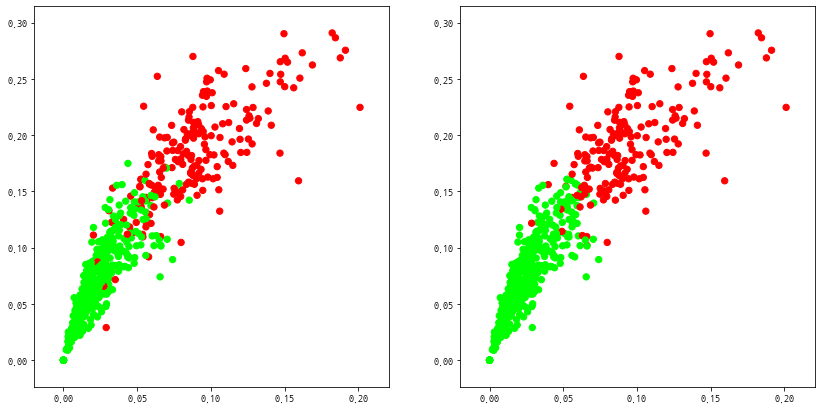

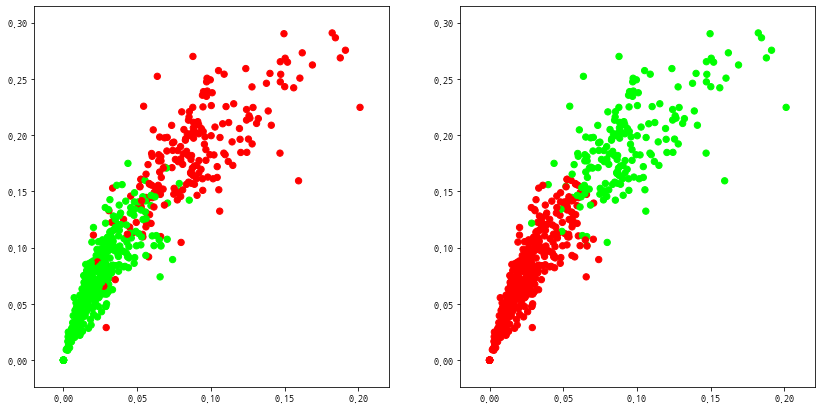

군집 정확도 : 0.905
군집 정확도 : 0.095


In [212]:
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y = pd.DataFrame(cancer.target)

y.columns = ['Targets']

# 두 개의 특성을 선택, 군집 정확도 확인
r = []
l = {}

for i in range(30):    
    for j in range(30):
        kmeans = KMeans(n_clusters=2).fit(X.iloc[:,[i,j]])
        predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)
        if sm.accuracy_score(y, predY) > 0.9:
            l[i,j] = sm.accuracy_score(y, predY)
            r.append(i)

print(np.unique(r))
display(l)

# 군집정확도가 높은 4개 특성 선택
kmeans = KMeans(n_clusters=2).fit(X.iloc[:,[6,7,16,27]])

# 군집정확도가 7, 27 특성으로 시각화
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])
plt.subplot(1,2,1) # 정답
plt.scatter(X.iloc[:,7], X.iloc[:,27], c=colormap[y.Targets], s=40)

plt.subplot(1,2,2) # k-means
plt.scatter(X.iloc[:,7], X.iloc[:,27], c=colormap[kmeans.labels_], s=40)

plt.show()

# [1,0] -> [0,1]로 변경
predY = np.choose(kmeans.labels_, [1,0,2]).astype(np.int64)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime'])
plt.subplot(1,2,1) # 정답
plt.scatter(X.iloc[:,7], X.iloc[:,27], c=colormap[y.Targets], s=40)

plt.subplot(1,2,2) # k-means
plt.scatter(X.iloc[:,7], X.iloc[:,27], c=colormap[predY], s=40)

plt.show()

print('군집 정확도 : {:.3f}'.format(sm.accuracy_score(y, kmeans.labels_)))
print('군집 정확도 : {:.3f}'.format(sm.accuracy_score(y, predY)))

# 군집 정확도 : 0.905

### 3차원 그래프로 시각화

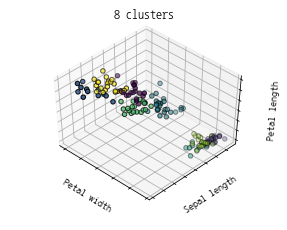

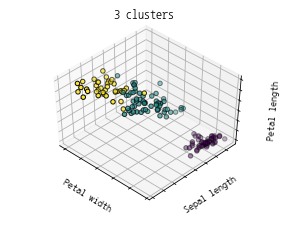

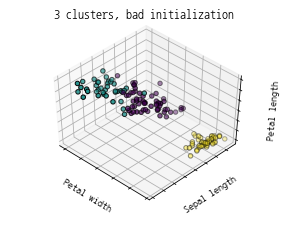

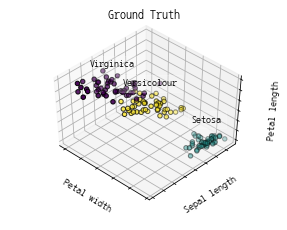

In [179]:
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()